# url: https://griddb.net/ja/blog/exploring-customers-personalities-using-python/

# Pythonを使ってお客様の個性を探る

このチュートリアルでは、婚姻状況、学歴、収入などの顧客情報を含むデータセットを調査します。企業がどのような顧客を扱っているかを把握することは、より良いカスタマイズされたサービスを提供するのに役立ちます。したがって、顧客分析とセグメンテーションは、ビジネスにおいて重要な役割を果たします。

このチュートリアルのアウトラインは次のとおりです。

1. データセットについて
2. 必要なライブラリのインポート
3. 探索的データ解析
4. 相関関係のプロット
5. データのエンコード
6. データのスケーリング
7. 次元数削減
8. クラスタリング
9. クラスタの可視化
10. 観測
11. まとめ

## 1. データセットについて
このチュートリアルで使用するデータセットはKaggleで公開されているものです。インスタンス(または行)の総数は2240であるのに対し、属性(または列)の総数は29です。前述のように、各属性は、婚姻状況、収入、顧客IDなど、顧客の分類に重要な人の特徴に対応します。

さっそくデータセットをダウンロードしてみましょう 次に、分析を開始するためのライブラリをインポートします。

url: https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/input

## 2. 必要なライブラリのインポート

さっそくデータセットをダウンロードしてみましょう 次に、分析を開始するためのライブラリをインポートします。

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
# パッケージのインストールに失敗した場合は、コマンドラインに pip install package-name と入力することでインストールすることができます。
# また、condaの仮想環境を使用している場合は、conda install package-nameと入力することもできます。

# データセットのロードと探索的データ解析 (EDA)
# さっそくCSVファイルを読み込んでみましょう。

# GridDBを利用する
# 大量のデータを保存する場合、CSVファイルでは煩雑でカオスな状態になることがあります。
# GridDBは、オープンソースで拡張性の高いデータベースであるため、優れた代替手段として機能します。
# IoTやビッグデータに最適化されているので、時系列データを効率的に保存することができます。
# また、インメモリデータアーキテクチャと並列処理により、高いパフォーマンスを実現します。GridDBは、公式サイトからダウンロードすることができます。

# GridDB-Pythonクライアントを利用することで、Python環境に直接データをデータフレームとして読み込むことができます。

# import griddb_python as griddb
# import pandas as pd

# sql_statement = ('SELECT * FROM marketing_campaign')
# movie_review_test = pd.read_sql_query(sql_statement, cont)

In [3]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")
display(data.head())
display(data.info())
display(data.describe(include = 'all'))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [4]:
# 前述の通り、合計2240個のインスタンスがあります。欠損値は数学演算の際に異常な振る舞いをする可能性があるため、欠損値を排除しておきましょう。
data = data.dropna()
len(data)

2216

In [5]:
# このデータセットには、24個の欠損インスタンスがありました。
# データセットの Date 属性も DateTime 形式に変換しておきましょう。
# この属性は、後で顧客がアクティブであった時間を計算するために使用されます。
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

<ipython-input-5-9accaf06d9f4>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
<ipython-input-5-9accaf06d9f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


In [6]:
# 新しい属性である Customer_dur を作成し、ある顧客がその会社に関連している期間を計算する予定です。
# 簡単のために、直近の顧客の日付を抽出し、それを使って他の顧客の期間を計算することにします。
days = []

d1 = max(dates)

for i in dates:
    delta = d1 - i
    days.append(delta)

data["Customer_dur"] = days
data["Customer_dur"] = pd.to_numeric(data["Customer_dur"], errors="coerce")

# では、次の属性である Marital Status を見てみましょう。headコマンドで見ると、2つ以上のカテゴリがあるように見えます。
data["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [7]:
# この属性には、さらに8つのカテゴリーがあります。しかし、セグメンテーションのプロセスを容易にするために、これらをグループ化することにします。
# ここでは、PartnerまたはAloneの2つの値を持つバイナリ属性、Living_Withを作成します。
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# 派生機能ができたので、Marital_Statusは冗長な属性として機能するようになりました。これを削除しましょう。
# また、プロモーションやディールの情報を含むカラムも、顧客セグメンテーションには関係がないので、削除します。
cols_del = ['Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)

# では、Education属性がいくつのカテゴリーを持つか見てみましょう。
data["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [8]:
# 同じステップを Education 属性でも繰り返します。この場合、カテゴリは Undergraduate, Graduate, Postgraduate となります。
data["Education"] = data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# 後段で計算しやすいように、オリジナルの機能から派生した新しい機能をいくつか作成する予定です。これらの機能は以下の通りです。
# Age: Year_of_Birth から導き出すことができる
# Spent: ワイン、果物、魚など、食べられるものの総量
# Children: Kidhome と Teenhome の合計
# Family_Size: Children 属性と一緒に Living_With 属性も使用することになります
# Is_Parent: Children 属性から派生した、0 か 1 の値を持つバイナリ属性

data["Age"] = 2021 - data["Year_Birth"]
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2}) + data["Children"]
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)

# 前回同様、冗長な属性は削除します。
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

# 変更後のデータは以下のようになります。
display(data.describe(include = 'all'))

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_dur,Living_With,Age,Spent,Children,Family_Size,Is_Parent
count,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2.216000e+03,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Partner,NaN,NaN,NaN,NaN,NaN
freq,1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1430,NaN,NaN,NaN,NaN,NaN
mean,NaN,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,4.423735e+16,NaN,52.179603,607.075361,0.947202,2.592509,0.714350
std,NaN,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,2.008532e+16,NaN,11.985554,602.900476,0.749062,0.905722,0.451825
min,NaN,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,25.000000,5.000000,0.000000,1.000000,0.000000
25%,NaN,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,2.937600e+16,NaN,44.000000,69.000000,0.000000,2.000000,0.000000
50%,NaN,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,4.432320e+16,NaN,51.000000,396.500000,1.000000,3.000000,1.000000
75%,NaN,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,5.927040e+16,NaN,62.000000,1048.000000,1.000000,3.000000,1.000000


# 4. 相関をプロットする
Is_Parentを主な分類属性としながら、新しく作成したこれらの特徴量をペアごとにプロットしてみます。

<Figure size 640x480 with 0 Axes>

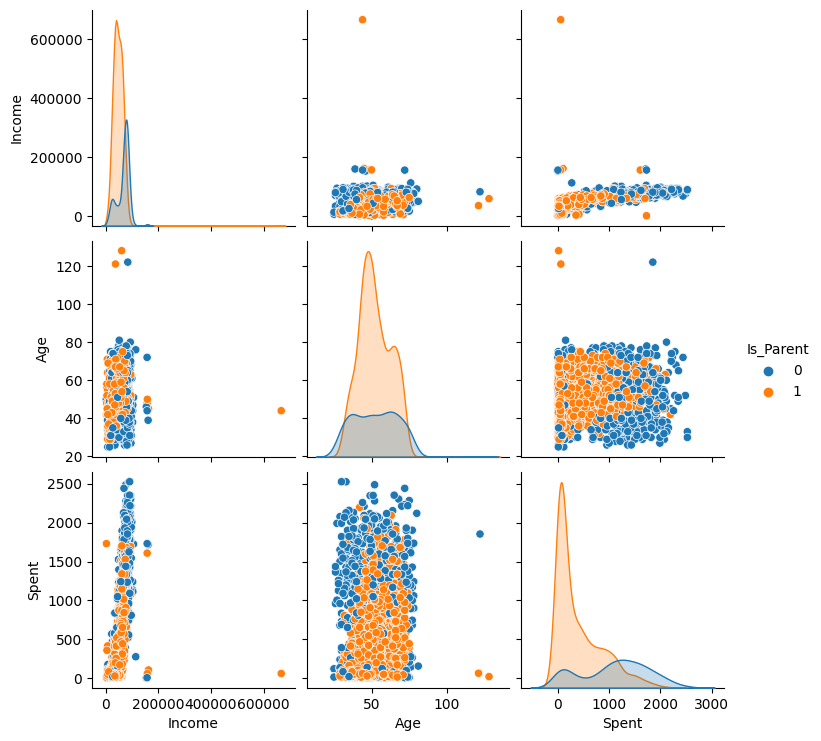

In [9]:
To_Plot = [ "Income", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent")
plt.show()

いくつかの異常値があることがわかります。
1. Age > 100 の可能性は極めて低い。これは、いくつかのデータインスタンスが古い可能性を示唆しています。
また、データの大部分は閾値80以下に集中しています。そのため、この閾値を超える少数のインスタンスを除外することにします

2. Income > 600000 のインスタンスは1つだけです

それを先に削除しておきましょう。


In [10]:
data = data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]
len(data)

2212

## 5. データのエンコード

カテゴリ変数は、文字列の値を直接数学的な演算に使うことができないため、機械学習タスクの前にエンコードする必要があります。データセットに含まれるカテゴリ属性を出力してみましょう。

In [11]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

display(object_cols)

['Education', 'Living_With']

In [12]:
# 対象の値を0からn-1までのクラスにエンコードするscikit-learnのLabel Encoderを使用します。
# この例では、Educationは3つのカテゴリを持つので、値はそれぞれ 0,1,2 で示されます。
# 同様に、Living_With はバイナリ属性なので、値は 0 または 1 の形式をとることになります。

LE=LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_dur,Living_With,Age,Spent,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,83894400000000000,0,64,1617,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,10800000000000000,0,67,27,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,40780800000000000,1,56,776,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,5616000000000000,1,37,53,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,27734400000000000,1,40,422,1,3,1


## 6. データのスケーリング

また、これらの数値はスケールが異なることにも注意が必要です。これは、ある属性が他の属性よりも大きく重要視されるような偏ったモデルになる可能性があります。したがって、同じようなスケールでマッピングすることが重要です。

標準スケーラーは、平均を取り除き、単位分散に特徴をスケーリングします。単位分散の計算方法の詳細は、こちらを参照してください。

In [13]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data), columns = data.columns)
display(scaled_data.head())

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_dur,Living_With,Age,Spent,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,-1.349603,1.018352,1.676245,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,-1.349603,1.274785,-0.963297,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.740959,0.334530,0.280110,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,0.740959,-1.289547,-0.920135,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,0.740959,-1.033114,-0.307562,0.069987,0.449070,0.632456


## 7. 次元数削減

スケーリングされたデータができましたが、列の総数がまだ多いので、これを処理する必要があります。列の数が多くなると次元が高くなり、作業が困難になります。簡単のために、いくつかの列はすでに冗長であるため、列の総数を3つに減らすことにします。

主成分分析（PCA）は、情報の損失を最小限に抑えることができるため、次元削減によく使われる手法の1つです。

In [14]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pd.DataFrame(pca.transform(scaled_data), columns = (["c1","c2", "c3"]))

display(pca_data)
display(pca_data.describe().T)

,c1,c2,c3
0,4.994347,-0.151298,2.643564
1,-2.884455,-0.006674,-1.864435
2,2.617864,-0.720830,-0.255638
3,-2.676036,-1.541998,-0.925513
4,-0.649591,0.209781,-0.025536
...,...,...,...
2207,2.321342,2.436416,0.527209
2208,-3.105958,4.020919,-1.502401
2209,2.673666,-1.869170,0.592264
2210,1.494055,1.701848,-1.627779


,count,mean,std,min,25%,50%,75%,max
c1,2212.0,1.156399e-16,2.878377,-5.969395,-2.538494,-0.780421,2.383290,7.444305
c2,2212.0,8.351768e-17,1.706839,-4.312200,-1.328310,-0.158107,1.242290,6.142710
c3,2212.0,-1.525804e-17,1.221948,-3.528002,-0.826460,-0.022984,0.800108,6.594055


## 8. クラスタリング

データのクレンジングと3次元化が完了したので、データをクラスターに分割します。このチュートリアルでは、scikit-learnライブラリのAgglomerative Clusteringを使用します。凝集型クラスタリングは、連結距離を用いた再帰的なクラスタリング手法です。詳細はこちらを参照してください。

しかし、現実のモデルでは、Elbow法のように、データのサンプルに対して理想的なクラスター数を予想するアプローチがあります。

url: https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.

In [15]:
ac = AgglomerativeClustering(n_clusters=4)
customer_ac = ac.fit_predict(pca_data)

# このデータを元のdataframeに追加してみましょう。
pca_data["Clusters"] = customer_ac
data["Clusters"]= customer_ac

display(pca_data)
display(data)

,c1,c2,c3,Clusters
0,4.994347,-0.151298,2.643564,3
1,-2.884455,-0.006674,-1.864435,2
2,2.617864,-0.720830,-0.255638,3
3,-2.676036,-1.541998,-0.925513,1
4,-0.649591,0.209781,-0.025536,2
...,...,...,...,...
2207,2.321342,2.436416,0.527209,0
2208,-3.105958,4.020919,-1.502401,0
2209,2.673666,-1.869170,0.592264,3
2210,1.494055,1.701848,-1.627779,0


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Customer_dur,Living_With,Age,Spent,Children,Family_Size,Is_Parent,Clusters
0,0,58138.0,0,0,58,635,88,546,172,88,...,4,7,83894400000000000,0,64,1617,0,1,0,3
1,0,46344.0,1,1,38,11,1,6,2,1,...,2,5,10800000000000000,0,67,27,2,3,1,2
2,0,71613.0,0,0,26,426,49,127,111,21,...,10,4,40780800000000000,1,56,776,0,2,0,3
3,0,26646.0,1,0,26,11,4,20,10,3,...,4,6,5616000000000000,1,37,53,1,3,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,6,5,27734400000000000,1,40,422,1,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,...,4,5,46742400000000000,1,54,1341,1,3,1,0
2236,1,64014.0,2,1,56,406,0,30,0,0,...,5,7,5270400000000000,1,75,444,3,5,1,0
2237,0,56981.0,0,0,91,908,48,217,32,12,...,13,6,27216000000000000,0,40,1241,0,1,0,3
2238,1,69245.0,0,1,8,428,30,214,80,30,...,10,3,27302400000000000,1,65,843,1,3,1,0


## 9. クラスターを可視化する

今度は、私たちのクラスターをプロットして、それらがどのように3Dで見えるかを見てみましょう。

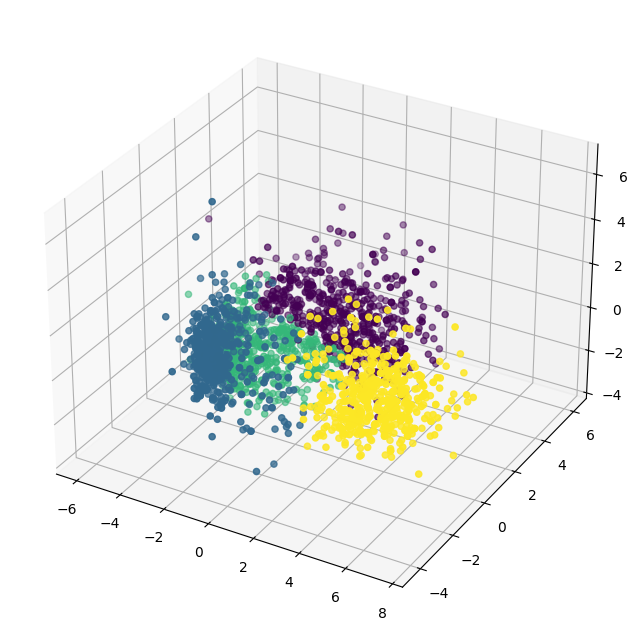

In [16]:
x = pca_data["c1"]
y = pca_data["c2"]
z = pca_data["c3"]

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=20, c = pca_data["Clusters"])
plt.show()

<Figure size 640x480 with 0 Axes>

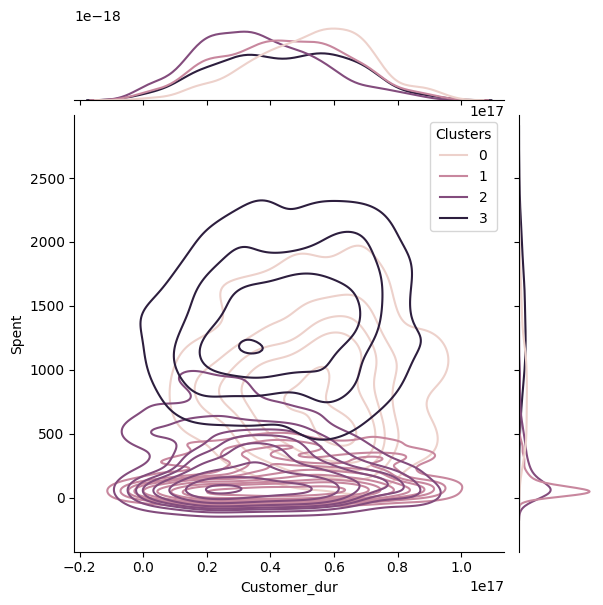

<Figure size 640x480 with 0 Axes>

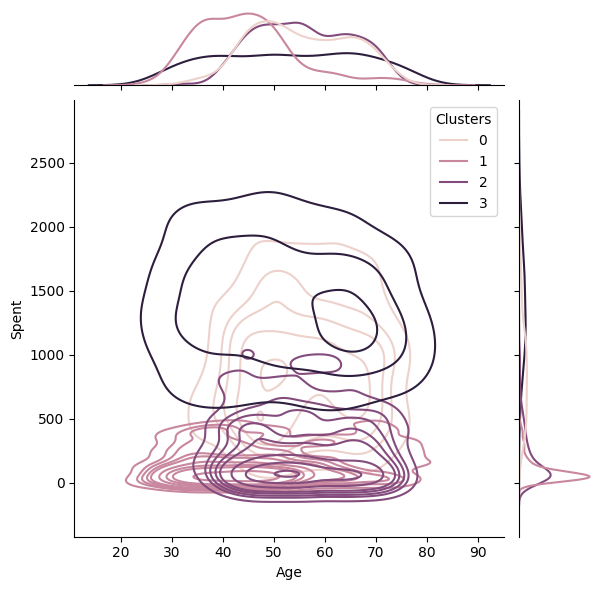

<Figure size 640x480 with 0 Axes>

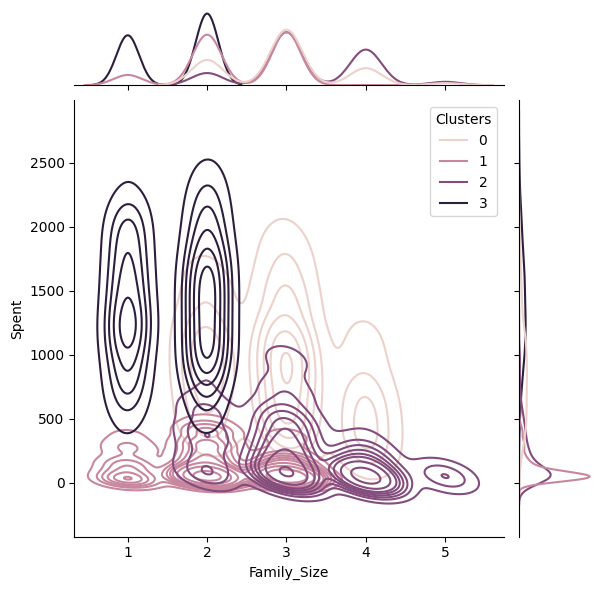

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 640x480 with 0 Axes>

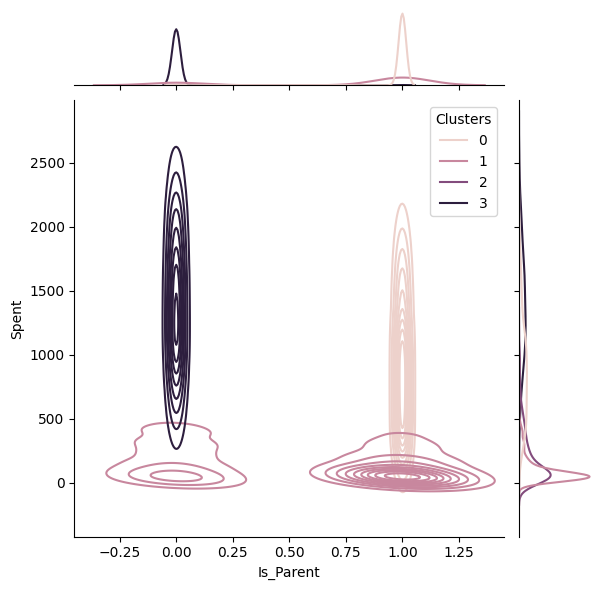

In [ ]:
# このチュートリアルで以前に作成した他の属性とSpent属性のペアワイズプロットをプロットしてみましょう。
# これにより、最終的な結果が各属性によってどのように影響されるか、またどのような顧客が各クラスタに属しているかを知ることができます。

columns = [ "Customer_dur", "Age", "Family_Size", "Is_Parent", "Education","Living_With"]
h = data["Clusters"]
for col in columns:
    plt.figure()
    sns.jointplot(x=data[col], y=data["Spent"], hue=h, kind="kde")
    plt.show()

## 10. 観測

上記のジョイントプロットから、いくつかの重要な知見を得ることができました。

    クラスター0: 確かに親がいる、40-70歳代、家族規模2-4人。
    クラスター1: 親ではない、30～80歳代、家族数1～2人。
    クラスター2: お客様の大半が親であり、20～80代のすべての年齢層で、家族の人数は1～3人。
    クラスター3: 親がほとんどで、年齢層は35～75歳、家族構成は2～5人。

Customer_dur 属性はクラスタ全体にまたがっており、1つのクラスタに特化していないため、幅広く広がった形状を得ることができます。

注意：チュートリアルを実行したシステムでは、seabornライブラリが最新版に更新されていないため、contourなどの一部の機能が期待通りに動作しませんでした。しかし、アップデートされた環境であれば、上記のグラフははっきりとした線とクラスタのラベルが表示され、より鮮明になるでしょう。

## 11. まとめ

このチュートリアルでは、顧客プロファイルを調査し、それが企業のビジネスにどのような影響を与えるかを見てきました。また、凝集型クラスタリングを使用して顧客をセグメント化しました。最後に、各クラスタに対応するいくつかの重要な特徴を特定しました。本ブログでは、大量のデータを非常に効率的かつスケーラブルに保存するための代替手段であるGridDBを紹介しました。

このコードはKaggleからインスパイアされたものです。

If you have any questions about the blog, please create a Stack Overflow post here https://stackoverflow.com/questions/ask?tags=griddb .
Make sure that you use the “griddb” tag so our engineers can quickly reply to your questions.

url: https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/notebook